In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [98]:
img_prev = cv2.imread('./src/Cup0.Jpg')
img_next = cv2.imread('./src/Cup1.Jpg')

In [99]:
img_next.shape

(480, 640, 3)

In [100]:
trackingPoint = [[350, 250], [200, 305], [245, 290]]

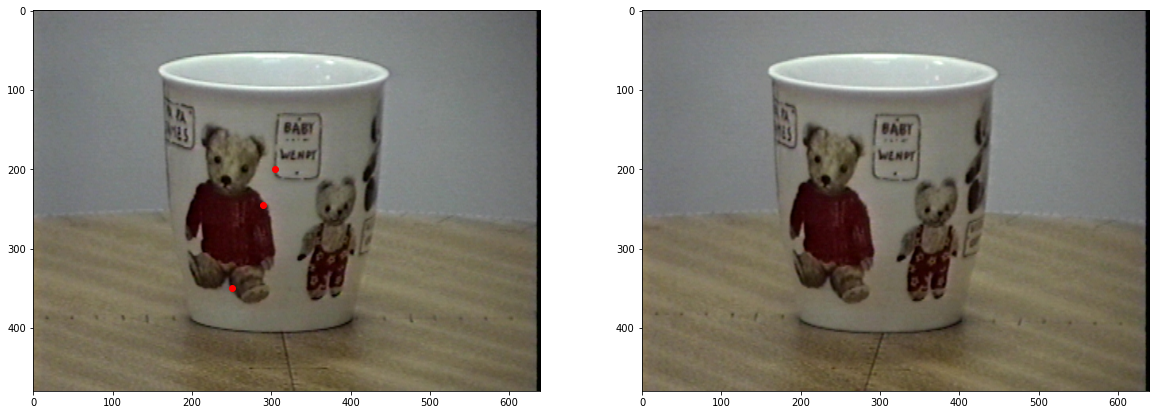

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(cv2.cvtColor(img_prev, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_next, cv2.COLOR_BGR2RGB))

for p in trackingPoint:
    ax[0].plot(p[1], p[0], 'o', color='red')

In [102]:
img_prev_gray = cv2.cvtColor(img_prev, cv2.COLOR_BGR2GRAY)
img_next_gray = cv2.cvtColor(img_next, cv2.COLOR_BGR2GRAY)

In [103]:
Iy = (img_prev_gray[2:, 1:-1] - img_prev_gray[1:-1, 1:-1]) / 2
Ix = (img_prev_gray[1:-1, 2:] - img_prev_gray[1:-1, 1:-1]) / 2
It = img_next_gray[1:-1, 1:-1] - img_prev_gray[1:-1, 1:-1]

In [104]:
window_size = [15, 15]

In [105]:
iter_points = []
for (Py, Px) in trackingPoint:
    iter_point = [[Py, Px]]
    
    while True:    
        crop_x_upper = int(Px + window_size[1] / 2)
        crop_x_lower = int(Px - window_size[1] / 2)
        crop_y_upper = int(Py + window_size[1] / 2)
        crop_y_lower = int(Py - window_size[1] / 2)

        mask = np.zeros(It.shape, dtype=np.bool8)
        mask[crop_y_lower:crop_y_upper, crop_x_lower:crop_x_upper] = True

        sub_Iy = Iy[mask]
        sub_Ix = Ix[mask]
        sub_It = It[mask]

        A = np.vstack([sub_Ix.flatten(), sub_Iy.flatten()]).T
        b = -sub_It

        v = np.linalg.pinv(A.T @ A) @ A.T @ b
        
        Py, Px = np.array([Py, Px]) - v

        iter_point.append([Py, Px])
        

        if np.sqrt(v[0]**2 + v[1]**2) < 0.9:
            break
    
    iter_point = np.array(iter_point, dtype=np.int32)
    iter_points.append(iter_point)    

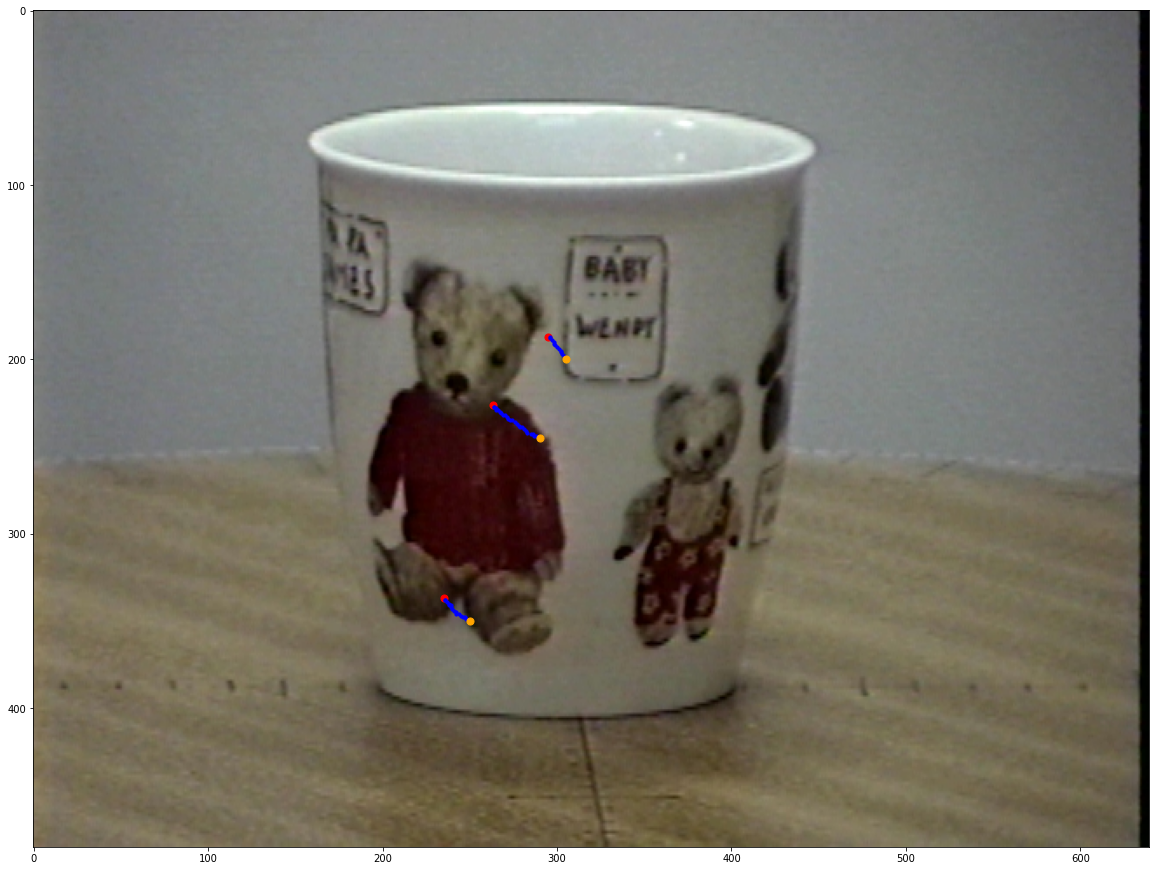

In [94]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img_prev, cv2.COLOR_BGR2RGB))

for ps in iter_points:
    plt.scatter(ps[-1, 1], ps[-1, 0], c='r', s=50)
    plt.scatter(ps[1:-1, 1], ps[1:-1, 0], c='blue', s=10)
    plt.scatter(ps[0, 1], ps[0, 0], c='orange', s=50)

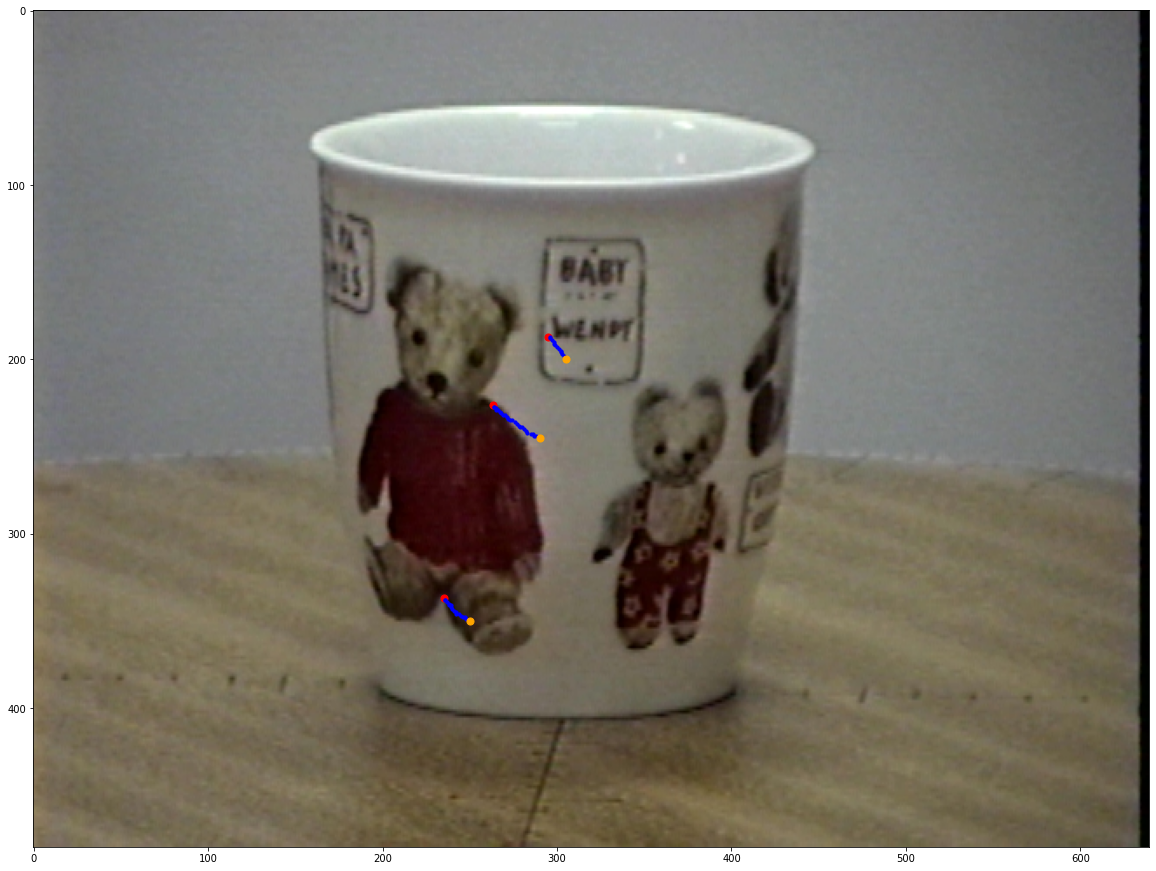

In [95]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img_next, cv2.COLOR_BGR2RGB))

for ps in iter_points:
    plt.scatter(ps[-1, 1], ps[-1, 0], c='r', s=50)
    plt.scatter(ps[1:-1, 1], ps[1:-1, 0], c='blue', s=10)
    plt.scatter(ps[0, 1], ps[0, 0], c='orange', s=50)